# **Import Library and Read Dataset**

In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

a = iris.data
b = iris.target

df_a = pd.DataFrame(a, columns =iris.feature_names)
df_b = pd.Series(b, name='species')

In [2]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
df_a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df_b

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
#Combines Feature and Species
df = pd.concat([df_a,df_b], axis=1)

In [6]:
df['species']=df['species'].apply(lambda x: iris['target_names'][x])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Exploratory Data Analysis (EDA)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.shape

(150, 5)

In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Checking the Duplicated Data
df.duplicated().sum()

1

In [14]:
#Checking Missing Value
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


# **Split Data**

In [15]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(df_a, df_b, test_size=0.2, random_state=40)

In [16]:
a_train.shape, a_test.shape, b_train.shape, b_test.shape

((120, 4), (30, 4), (120,), (30,))

# **Train the Model**

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=40)
model.fit(a_train, b_train)

DecisionTreeClassifier(random_state=40)

# **Prediction and Evaluation**

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 4. Memprediksi dan mengevaluasi
b_pred = model.predict(a_test)

accuracy = accuracy_score(b_test, b_pred)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 100.00%


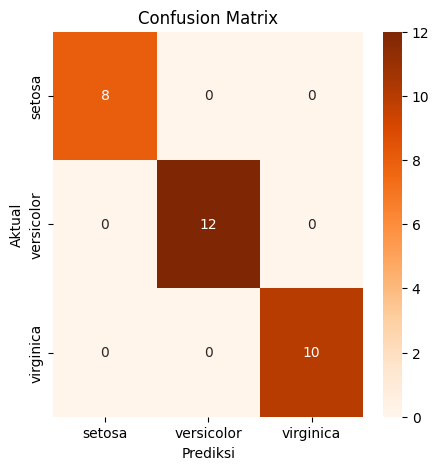

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(b_test, b_pred)

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(b_test, b_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Decision Tree Classification**

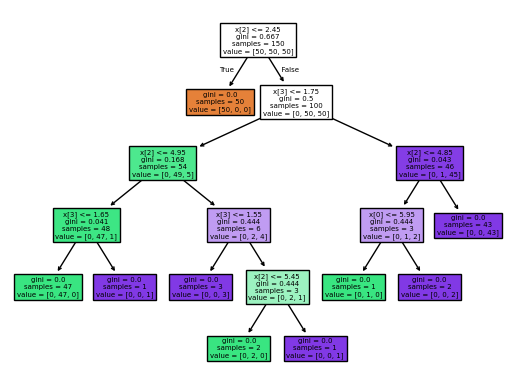

In [21]:
from sklearn.tree import plot_tree

plt.figure()
cls=DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(cls, filled=True)
plt.show()

# **Visualization**

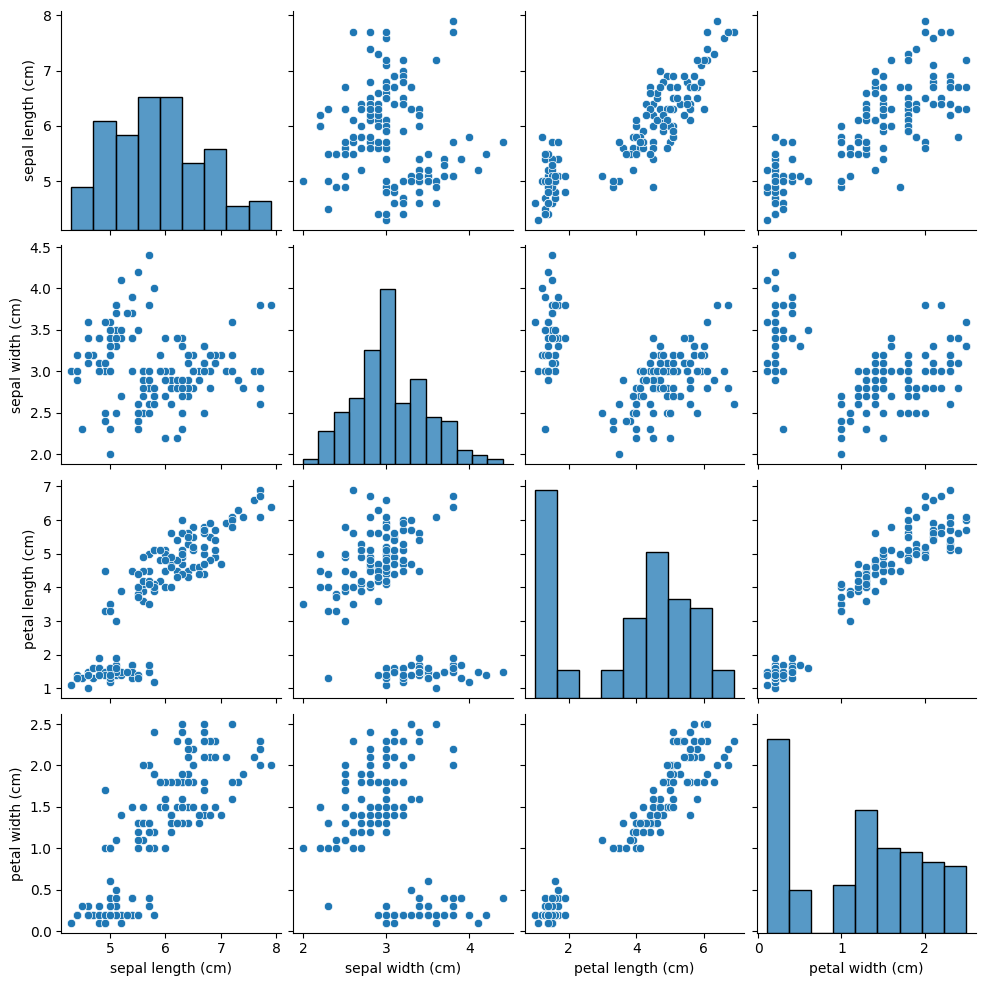

In [22]:
#Scatter Plot All of The Features
sns.pairplot(df)
plt.show()

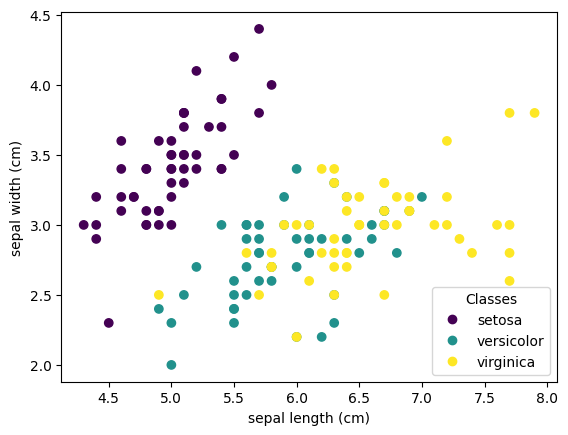

In [23]:
#Scatter Plot (Sepal Length and Sepal Width)
splot, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
splot = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

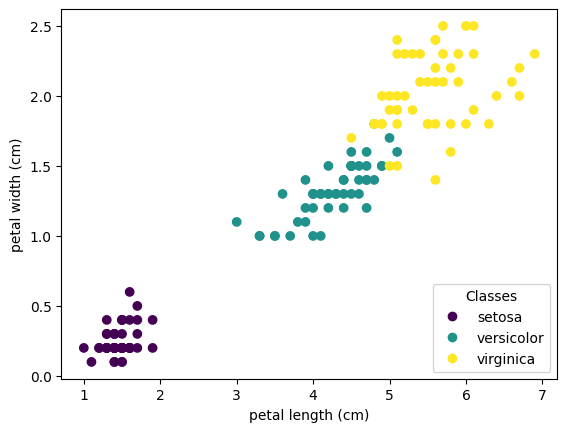

In [24]:
#Scatter Plot (Petal Length and Petal Width)
splot, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
splot = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)